## 1. Import Section

#### module import 

In [139]:
#Basic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
import os
print(os.listdir())
warnings.filterwarnings('ignore')
%matplotlib inline

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import xgboost as xgb

['heart_disease_bn_0.csv', 'thesis.ipynb', '.ipynb_checkpoints']


#### dataset import

In [140]:
dataset = pd.read_csv("heart_disease_bn_0.csv")

In [141]:
dataset.shape

(44, 19)

In [142]:
dataset.head()

,age,sex,occupation,who,smoking,obesity,diet,physical_activity,stress,chest_pain_type,previous_chest_pain,edema,bp_systolic,bp_diastolic,heart_rate,diabetes,troponin,ecg,target
0,60,male,farmer,no,yes,no,normal,yes,normal,typical,no,no,115.0,75.0,80.0,yes,negative,normal,0
1,54,male,businessman,no,yes,no,normal,no,normal,atypical,no,no,140.0,90.0,150.0,no,negative,abnormal,1
2,45,male,driver,brother,yes,no,normal,yes,high,typical,yes,no,90.0,60.0,70.0,no,positive,normal,1
3,60,male,nothing,no,no,no,normal,no,normal,non,yes,no,140.0,90.0,131.0,no,negative,abnormal,0
4,52,male,nothing,no,yes,no,normal,no,high,typical,no,no,105.0,60.0,75.0,no,positive,normal,1


In [143]:
dataset.describe()

,age,bp_systolic,bp_diastolic,heart_rate,target
count,44.000000,31.000000,31.000000,32.000000,44.000000
mean,58.045455,124.838710,79.741935,87.437500,0.659091
std,15.545813,25.281214,17.264545,26.059408,0.479495
min,26.000000,75.000000,50.000000,54.000000,0.000000
25%,50.000000,110.000000,67.500000,70.750000,0.000000
50%,60.000000,120.000000,80.000000,78.000000,1.000000
75%,65.000000,140.000000,90.000000,97.750000,1.000000
max,90.000000,180.000000,120.000000,165.000000,1.000000


In [144]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 19 columns):
age                    44 non-null int64
sex                    44 non-null object
occupation             44 non-null object
who                    44 non-null object
smoking                44 non-null object
obesity                44 non-null object
diet                   44 non-null object
physical_activity      44 non-null object
stress                 44 non-null object
chest_pain_type        44 non-null object
previous_chest_pain    44 non-null object
edema                  44 non-null object
bp_systolic            31 non-null float64
bp_diastolic           31 non-null float64
heart_rate             32 non-null float64
diabetes               44 non-null object
troponin               36 non-null object
ecg                    41 non-null object
target                 44 non-null int64
dtypes: float64(3), int64(2), object(14)
memory usage: 6.6+ KB


## 2. Pre-Processing/Cleaning

#### handle named value by mapping

In [145]:
sex_mapping = {"male": 0, "female": 1}
dataset['sex'] = dataset['sex'].map(sex_mapping)

occupation_mapping = {"nothing": 0, "farmer": 1, "businessman": 2, "driver": 3, "serviceholder": 4,
       "worker": 5, "housewife": 6}
dataset['occupation'] = dataset['occupation'].map(occupation_mapping)

who_mapping = {"no": 0, "father": 1, "brother": 2, "son": 3}
dataset['who'] = dataset['who'].map(who_mapping)

smoking_mapping = {"no": 0, "yes": 1}
dataset['smoking'] = dataset['smoking'].map(smoking_mapping)

obesity_mapping = {"no": 0, "yes": 1}
dataset['obesity'] = dataset['obesity'].map(obesity_mapping)

diet_mapping = {"normal": 0, "abnormal": 1}
dataset['diet'] = dataset['diet'].map(diet_mapping)

physical_activity_mapping = {"no": 0, "yes": 1}
dataset['physical_activity'] = dataset['physical_activity'].map(physical_activity_mapping)

stress_mapping = {"normal": 0, "high": 1}
dataset['stress'] = dataset['stress'].map(stress_mapping)

chest_pain_type_mapping = {"typical": 0, "atypical": 1, "non": 2}
dataset['chest_pain_type'] = dataset['chest_pain_type'].map(chest_pain_type_mapping)

previous_chest_pain_mapping = {"no": 0, "yes": 1}
dataset['previous_chest_pain'] = dataset['previous_chest_pain'].map(previous_chest_pain_mapping)

edema_mapping = {"no": 0, "yes": 1}
dataset['edema'] = dataset['edema'].map(edema_mapping)

diabetes_mapping = {"no": 0, "yes": 1}
dataset['diabetes'] = dataset['diabetes'].map(diabetes_mapping)

troponin_mapping = {"negative": 0, "positive": 1}
dataset['troponin'] = dataset['troponin'].map(troponin_mapping)

ecg_mapping = {"undefined": 0, "normal": 1, "abnormal": 2}
dataset['ecg'] = dataset['ecg'].map(ecg_mapping)


#### handle missing values

In [146]:
dataset.isnull().sum()

age                     0
sex                     0
occupation              0
who                     0
smoking                 0
obesity                 0
diet                    0
physical_activity       0
stress                  0
chest_pain_type         0
previous_chest_pain     0
edema                   0
bp_systolic            13
bp_diastolic           13
heart_rate             12
diabetes                0
troponin                8
ecg                     3
target                  0
dtype: int64

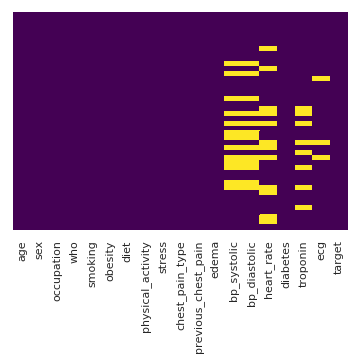

In [147]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [148]:
# impute missing numerical values with median of the column

dataset["bp_systolic"].fillna(dataset.groupby("sex")["bp_systolic"].transform("median"), inplace=True)
dataset["bp_diastolic"].fillna(dataset.groupby("sex")["bp_diastolic"].transform("median"), inplace=True)
dataset["heart_rate"].fillna(dataset.groupby("sex")["heart_rate"].transform("median"), inplace=True)

In [149]:
# impute missing numerical values with mode of the column

dataset.troponin.fillna(dataset.troponin.mode()[0], inplace=True)

In [150]:
# impute missing categorical values with prediction

knn_classifier_ecg = KNeighborsClassifier(n_neighbors = 3)

data_ecg = dataset[['age','sex','occupation','who','smoking', 'obesity', 'diet', 'physical_activity', 'stress', 
                'chest_pain_type' , 'previous_chest_pain', 'edema', 'bp_systolic', 'bp_diastolic', 'heart_rate'
                , 'diabetes', 'troponin', 'ecg']]

X_train_ecg = data_ecg[data_ecg['ecg'].notnull()].drop(columns='ecg')
y_train_ecg = data_ecg[data_ecg['ecg'].notnull()]['ecg']
X_test_ecg = data_ecg[data_ecg['ecg'].isnull()].drop(columns='ecg')
y_test_ecg = data_ecg[data_ecg['ecg'].isnull()]['ecg']

knn_classifier_ecg.fit(X_train_ecg, y_train_ecg)
predicted_ecg = knn_classifier_ecg.predict(X_test_ecg)

dataset.ecg[dataset.ecg.isnull()] = predicted_ecg

In [151]:
dataset.isnull().sum()

age                    0
sex                    0
occupation             0
who                    0
smoking                0
obesity                0
diet                   0
physical_activity      0
stress                 0
chest_pain_type        0
previous_chest_pain    0
edema                  0
bp_systolic            0
bp_diastolic           0
heart_rate             0
diabetes               0
troponin               0
ecg                    0
target                 0
dtype: int64

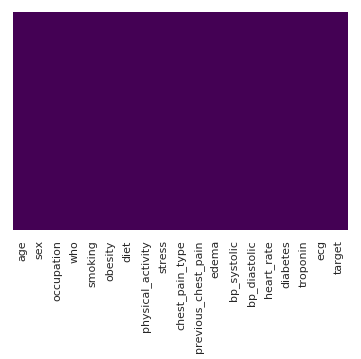

In [152]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## 3. Exploratory Data Analysis (EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f272dd919b0>,
      dtype=object)

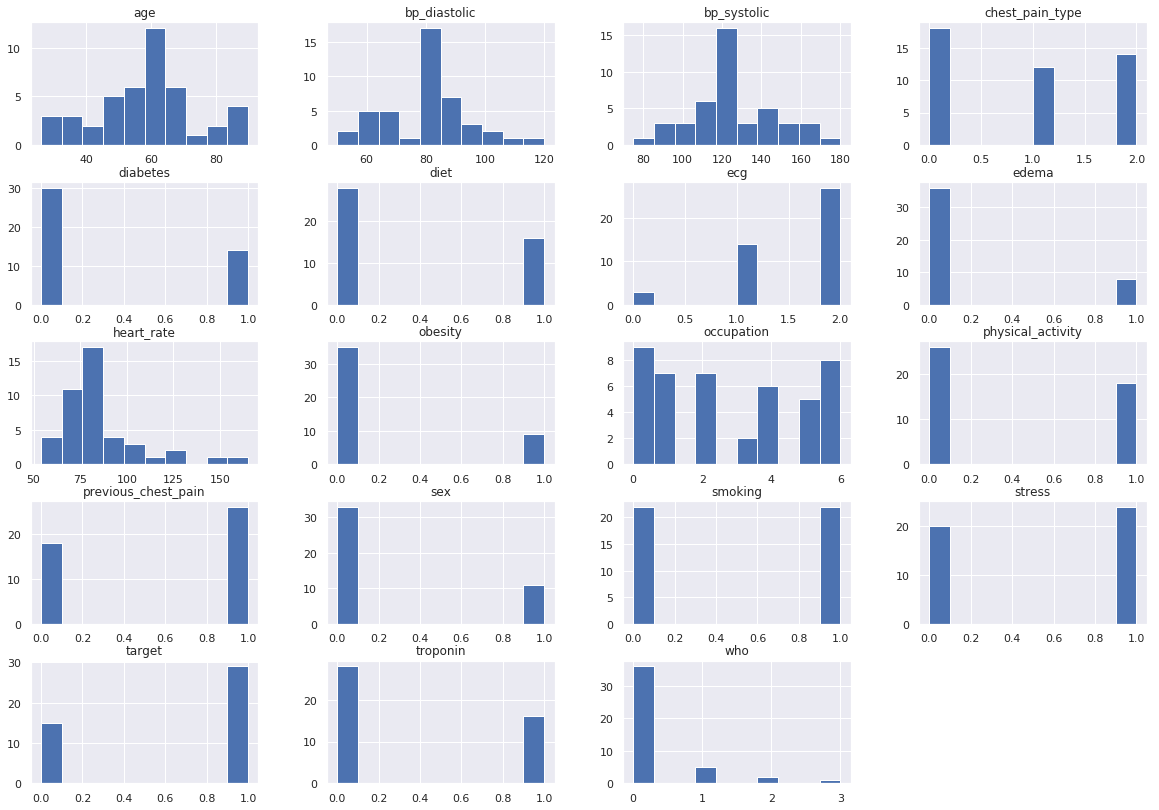

In [153]:
rcParams['figure.figsize'] = 20, 14
dataset.hist()

In [154]:
def bar_chart(feature):
    heart_disease = dataset[dataset['target']==1][feature].value_counts()
    not_heart_disease = dataset[dataset['target']==0][feature].value_counts()
    df = pd.DataFrame([heart_disease, not_heart_disease])
    df.index = ['heart_disease','not_heart_disease']
    df.plot(title= feature, kind='bar',stacked=True, figsize=(8,4))

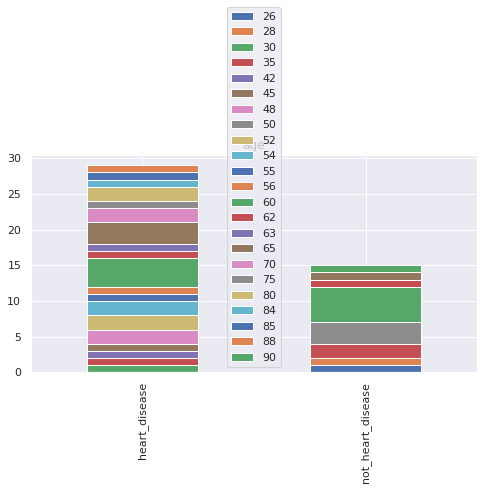

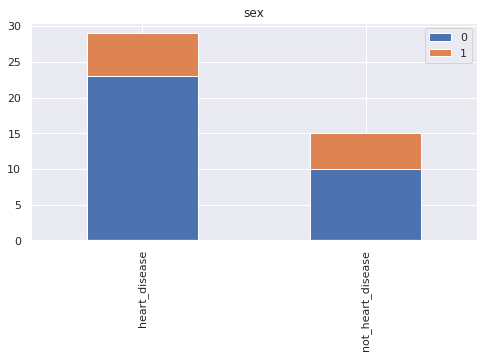

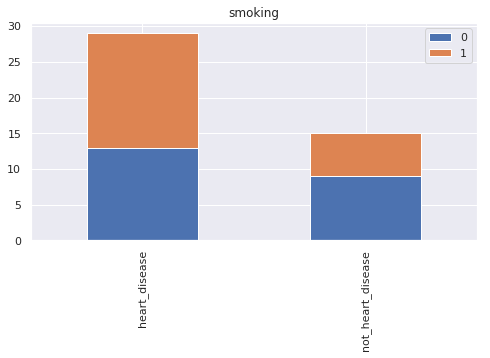

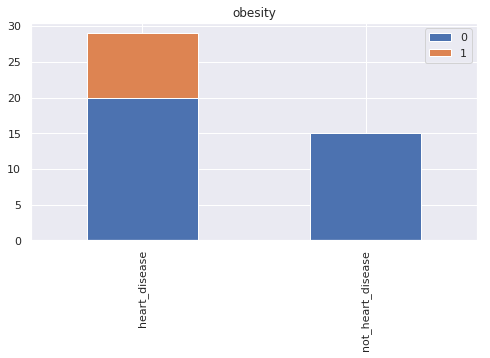

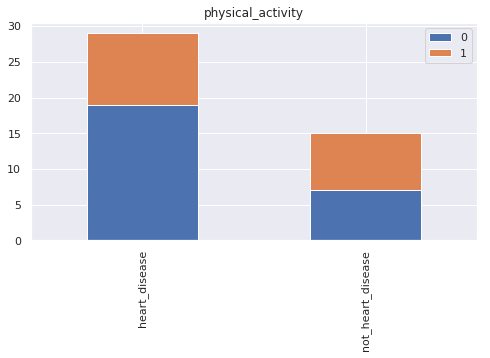

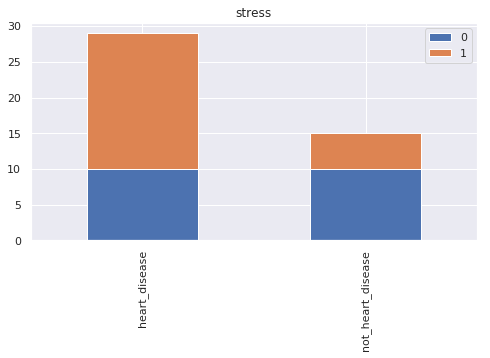

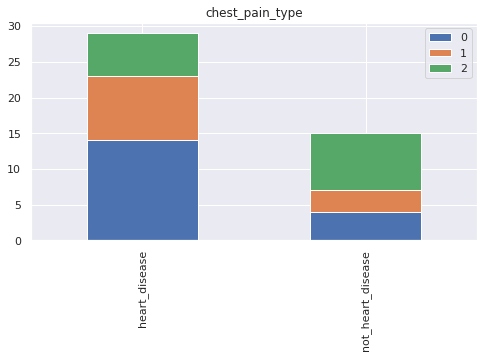

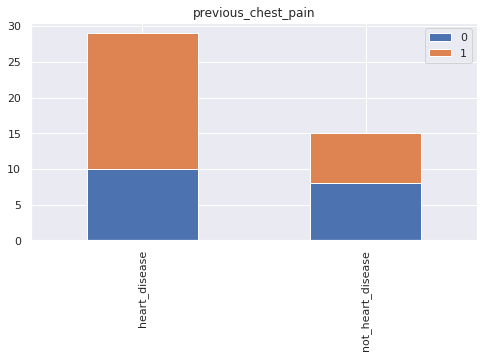

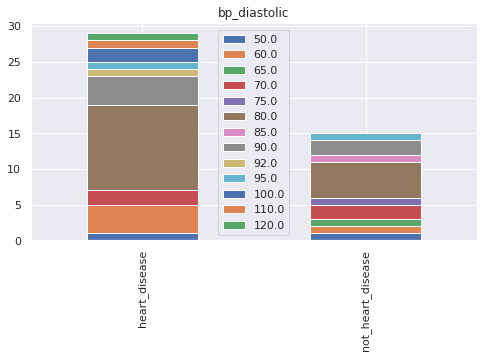

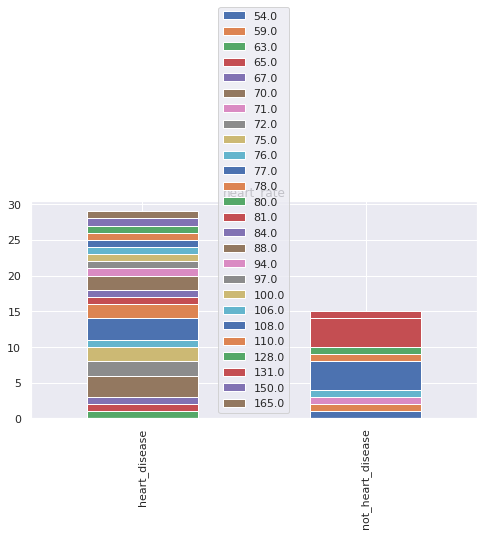

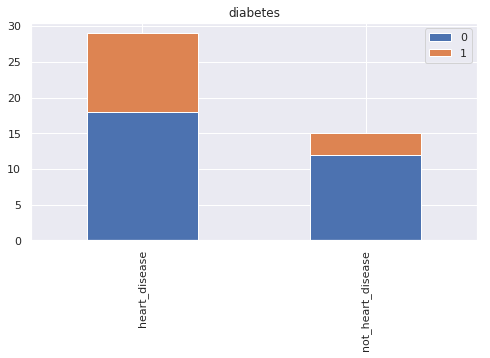

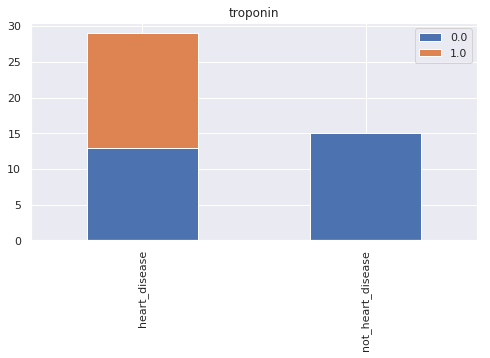

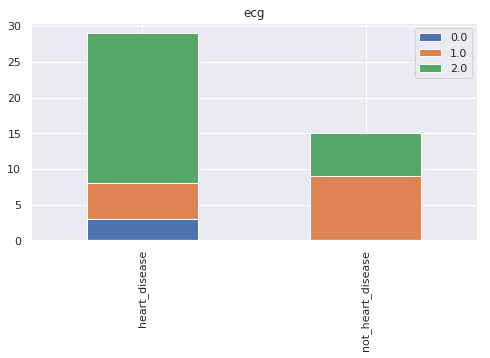

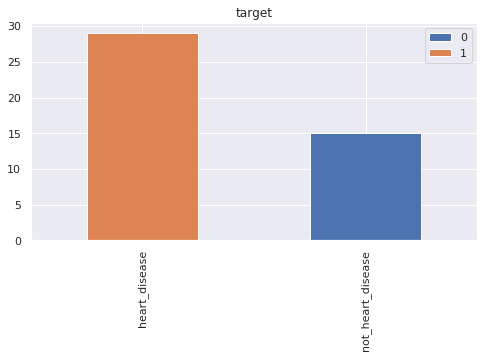

In [156]:
rcParams['figure.figsize'] = 10, 10
for i in feature_selected:
    bar_chart(i)

In [186]:
def facet_grid(feature):
    facet = sns.FacetGrid(dataset, hue="target",aspect=4)
    facet.map(sns.kdeplot, feature, shade= True)
    facet.set(xlim=(0, dataset[feature].max()))
    facet.add_legend() 
    plt.show()

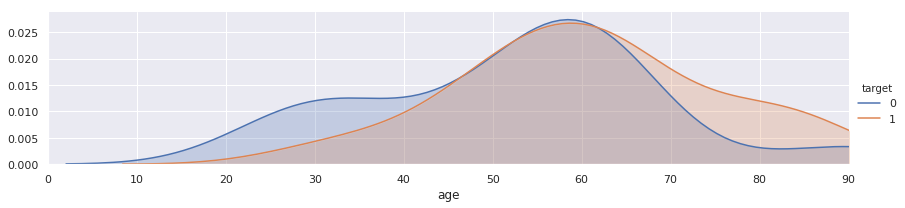

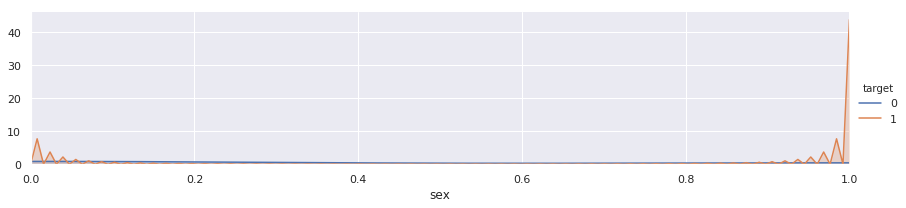

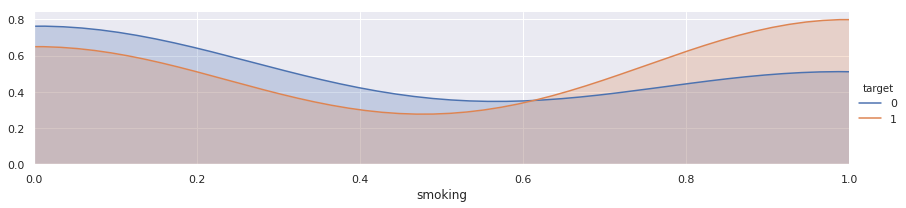

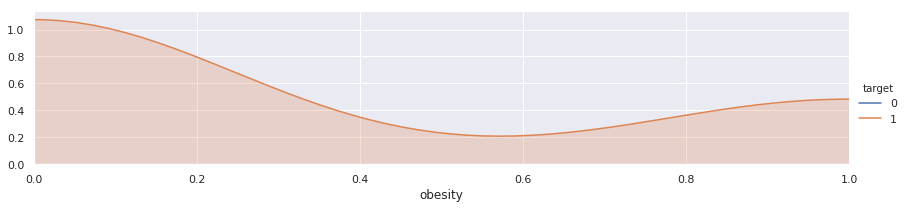

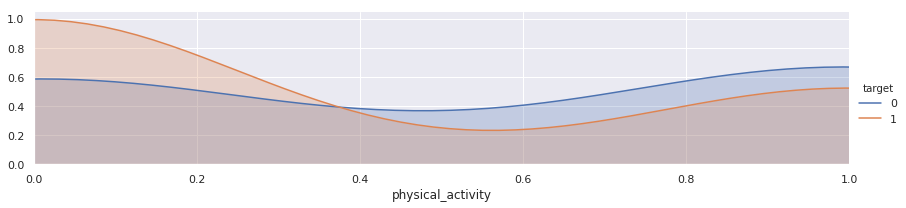

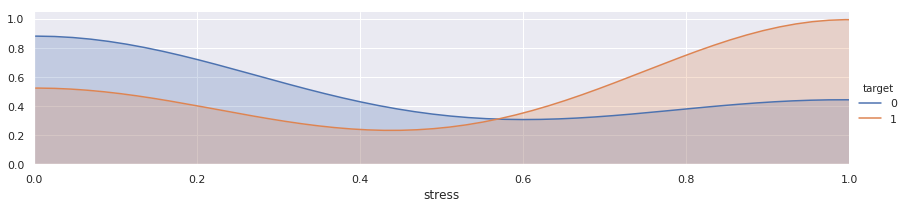

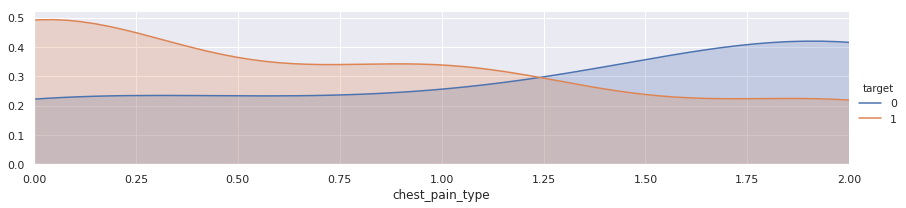

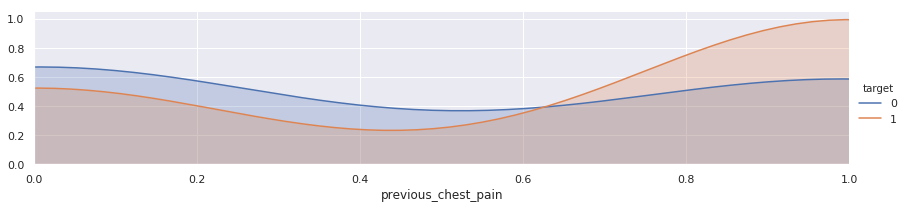

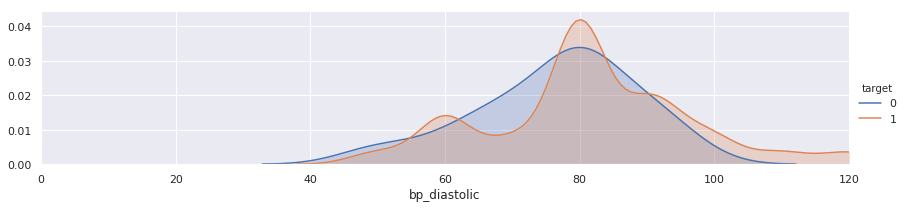

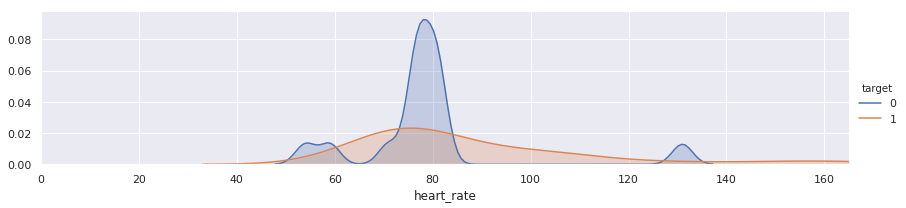

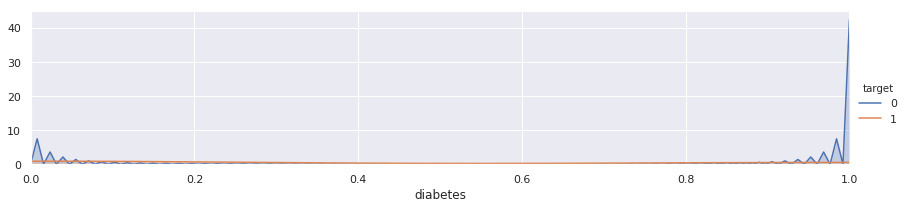

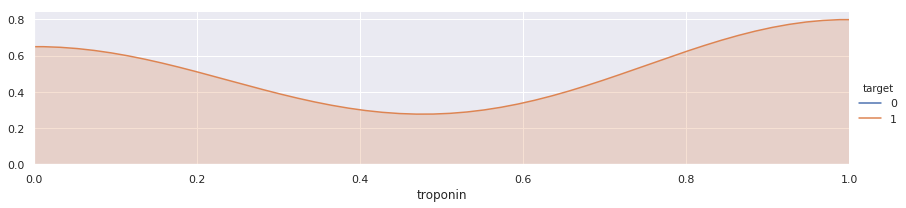

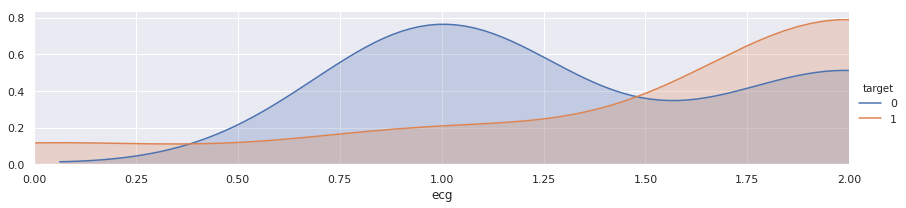

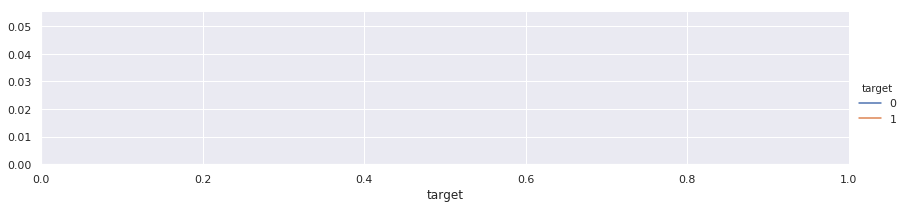

In [188]:
rcParams['figure.figsize'] = 10, 10
for i in feature_selected:
    facet_grid(i)

## 4. Feature engineering

#### Correlation Checking

In [157]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target                 1.000000
troponin               0.543660
obesity                0.364698
stress                 0.306382
chest_pain_type        0.303283
age                    0.248596
heart_rate             0.204089
diabetes               0.182484
physical_activity      0.181738
previous_chest_pain    0.181738
ecg                    0.168749
bp_diastolic           0.164479
bp_systolic            0.147314
diet                   0.144976
smoking                0.143839
sex                    0.138409
edema                  0.090408
who                    0.080174
occupation             0.037681
Name: target, dtype: float64


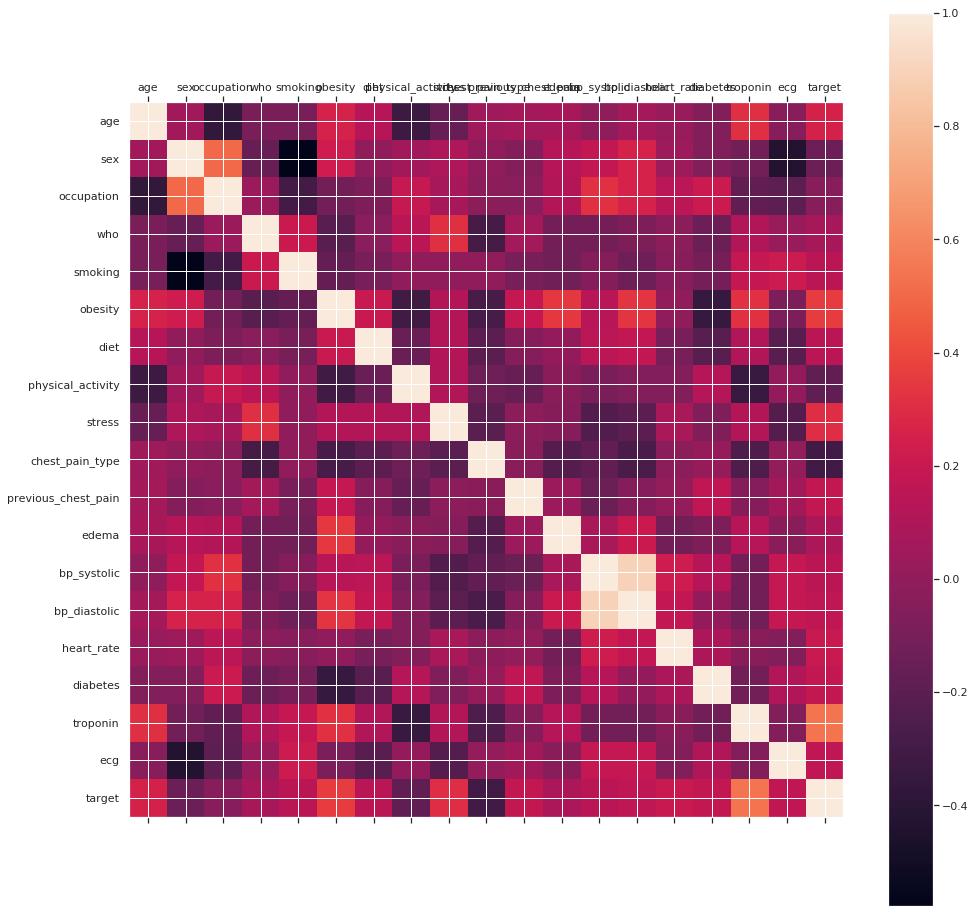

In [158]:
rcParams['figure.figsize'] = 42, 42
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()


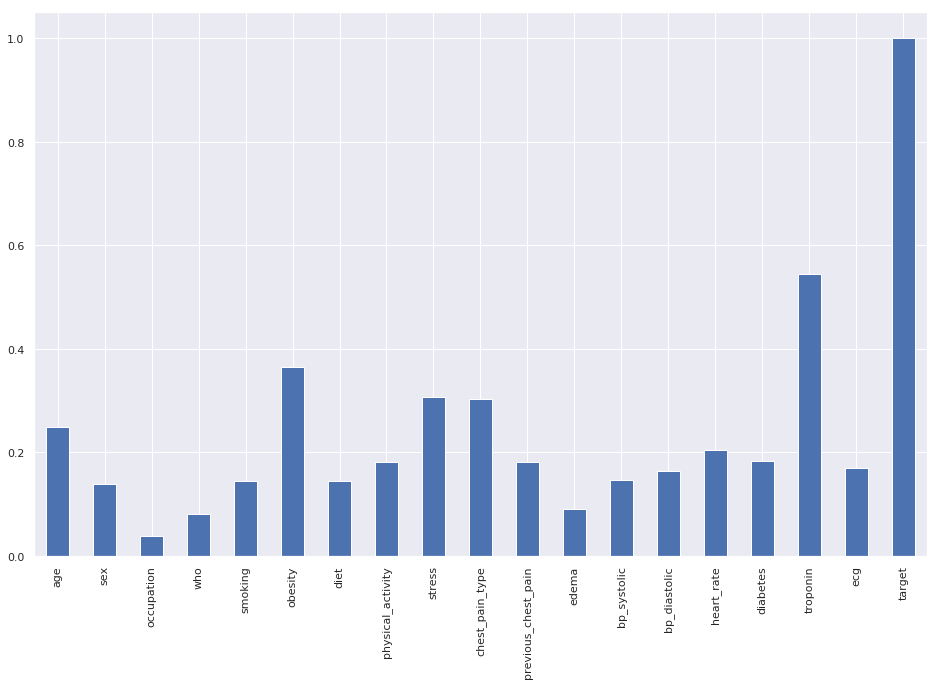

In [159]:
rcParams['figure.figsize'] = 16, 10
dataset.corr()["target"].abs().plot(kind='bar')

#### feature selection

In [160]:
feature_selected = ['age','sex','smoking', 'obesity', 'physical_activity', 'stress', 
                'chest_pain_type' , 'previous_chest_pain', 'bp_diastolic', 'heart_rate'
                , 'diabetes', 'troponin', 'ecg','target']
data_selected = dataset[feature_selected]

In [161]:
data_selected.shape

(44, 14)

#### convert categorical to dummies values

In [191]:
data_selected = pd.get_dummies(data_selected, columns = ['sex', 'smoking', 'obesity', 'physical_activity', 
                'stress', 'chest_pain_type', 'previous_chest_pain', 'diabetes', 'troponin', 'ecg'])

#### feature scaling

In [162]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'bp_diastolic', 'heart_rate']
data_selected[columns_to_scale] = standardScaler.fit_transform(data_selected[columns_to_scale])

In [222]:
data_selected.shape

(44, 26)

## 5. Prediction

#### train test split

In [198]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.3,random_state=0)

In [199]:
predictors_selected = data_selected.drop("target",axis=1)
target_selected = data_selected["target"]

X_train_selected,X_test_selected,y_train_selected,y_test_selected = train_test_split(predictors_selected,target_selected,test_size=0.3,random_state=0)

In [200]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (30, 18)
X_test (14, 18)
y_train (30,)
y_test (14,)


In [201]:
print('X_train_selected', X_train_selected.shape)
print('X_test_selected', X_test_selected.shape)
print('y_train_selected', y_train_selected.shape)
print('y_test_selected', y_test_selected.shape)

X_train_selected (30, 25)
X_test_selected (14, 25)
y_train_selected (30,)
y_test_selected (14,)


#### model fitting

#### Logistic Regression

In [202]:
# for dataset
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 64.29 %


In [203]:
# for data_selected
lr = LogisticRegression()
lr.fit(X_train_selected, y_train_selected)
y_pred_lr_selected = lr.predict(X_test_selected)

score_lr_selected = round(accuracy_score(y_pred_lr_selected, y_test_selected)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr_selected)+" %")

The accuracy score achieved using Logistic Regression is: 78.57 %


#### Naive Bayes

In [204]:
# for dataset
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 64.29 %


In [205]:
# for data_selected
nb = GaussianNB()
nb.fit(X_train_selected, y_train_selected)
y_pred_nb_selected = nb.predict(X_test_selected)

score_nb_selected = round(accuracy_score(y_pred_nb_selected, y_test_selected)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb_selected)+" %")

The accuracy score achieved using Naive Bayes is: 64.29 %


#### K Neighbors Classifier

In [206]:
# for dataset
knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
score_knn = round(max(knn_scores)*100, 2)
print("The score for K Neighbors Classifier is: "+str(score_knn)+" %")

The score for K Neighbors Classifier is: 78.57 %


In [207]:
# for data_selected
knn_scores_selected = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train_selected, y_train_selected)
    knn_scores_selected.append(knn_classifier.score(X_test_selected, y_test_selected))
score_knn_selected = round(max(knn_scores_selected)*100, 2)
print("The score for K Neighbors Classifier is: "+str(score_knn_selected)+" %")

The score for K Neighbors Classifier is: 92.86 %


#### Support Vector Classifier

In [208]:
# for dataset
# kernels = ['linear', 'poly', 'sigmoid', 'rbf']
sv = SVC(kernel='sigmoid')
sv.fit(X_train, y_train)
y_pred_svm = sv.predict(X_test)

score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 78.57 %


In [209]:
# for data_selected
# kernels = ['linear', 'poly', 'sigmoid', 'rbf']
sv = SVC(kernel='linear')
sv.fit(X_train_selected, y_train_selected)
y_pred_svm_selected = sv.predict(X_test_selected)

score_svm_selected = round(accuracy_score(y_pred_svm_selected, y_test_selected)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm_selected)+" %")

The accuracy score achieved using Linear SVM is: 71.43 %


#### Decision Tree

In [210]:
#for dataset
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt, y_test)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

score_dt = round(accuracy_score(y_pred_dt, y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 71.43 %


In [212]:
# data_selected
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_selected, y_train_selected)
    y_pred_dt_selected = dt.predict(X_test_selected)
    current_accuracy = round(accuracy_score(y_pred_dt_selected, y_test_selected)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_selected,y_train_selected)
y_pred_dt_selected = dt.predict(X_test_selected)

score_dt_selected = round(accuracy_score(y_pred_dt_selected, y_test_selected)*100,2)
print("The accuracy score achieved using Decision Tree is: "+str(score_dt_selected)+" %")

The accuracy score achieved using Decision Tree is: 71.43 %



#### Random Forest

In [216]:
# for dataset
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state = x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf, y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

score_rf = round(accuracy_score(y_pred_rf, y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 85.71 %


In [215]:
# for data_selected
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train_selected,y_train_selected)
    y_pred_rf_selected = rf.predict(X_test_selected)
    current_accuracy = round(accuracy_score(y_pred_rf_selected, y_test_selected)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_selected,y_train_selected)
y_pred_rf_selected = rf.predict(X_test_selected)

score_rf_selected = round(accuracy_score(y_pred_rf_selected, y_test_selected)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf_selected)+" %")

The accuracy score achieved using Random Forest is: 92.86 %


#### XGBoost

In [213]:
# for dataset
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 57.14 %


In [214]:
# for data_selected
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_selected, y_train_selected)
y_pred_xgb_selected = xgb_model.predict(X_test_selected)

score_xgb_selected = round(accuracy_score(y_pred_xgb_selected, y_test_selected)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb_selected)+" %")


The accuracy score achieved using XGBoost is: 64.29 %


#### Scores

In [217]:
# for dataset
scores = [score_lr,score_nb, score_knn, score_svm,score_dt,score_rf, score_xgb]
algorithms = ["Logistic Regression","Naive Bayes", "K Neighbors","Support Vector Machine","Decision Tree","Random Forest", "XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 64.29 %
The accuracy score achieved using Naive Bayes is: 64.29 %
The accuracy score achieved using K Neighbors is: 78.57 %
The accuracy score achieved using Support Vector Machine is: 78.57 %
The accuracy score achieved using Decision Tree is: 71.43 %
The accuracy score achieved using Random Forest is: 85.71 %
The accuracy score achieved using XGBoost is: 57.14 %


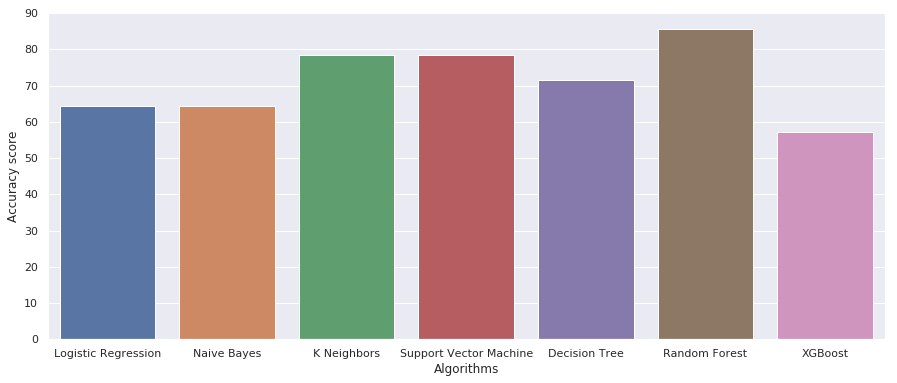

In [218]:
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [219]:
# for data_selected
scores_selected = [score_lr_selected, score_nb_selected, score_knn, score_svm_selected, score_dt_selected, score_rf_selected, score_xgb_selected]
algorithms = ["Logistic Regression","Naive Bayes", "K Neighbors","Support Vector Machine","Decision Tree","Random Forest", "XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores_selected[i])+" %")

The accuracy score achieved using Logistic Regression is: 78.57 %
The accuracy score achieved using Naive Bayes is: 64.29 %
The accuracy score achieved using K Neighbors is: 78.57 %
The accuracy score achieved using Support Vector Machine is: 71.43 %
The accuracy score achieved using Decision Tree is: 71.43 %
The accuracy score achieved using Random Forest is: 92.86 %
The accuracy score achieved using XGBoost is: 64.29 %


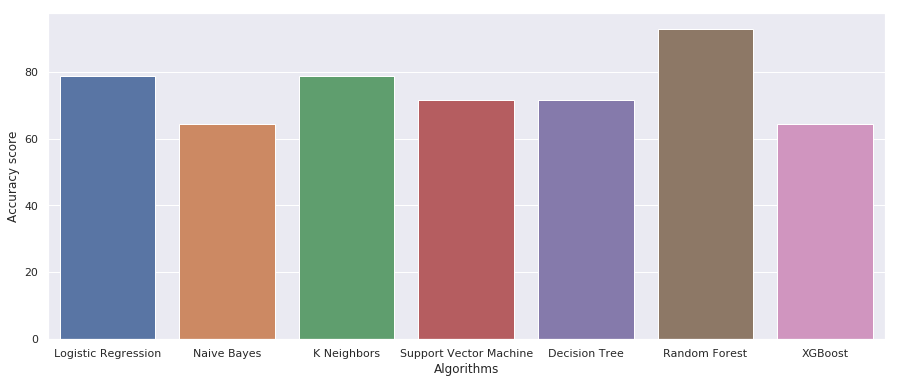

In [220]:
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores_selected)